#### DSC640-T301 
#### Week-10 Exercise 
##### Chitramoy Mukherjee
##### Date: 11/04/2024

#### Import TSA complaint data.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import folium from folium.plugins
#import HeatMap

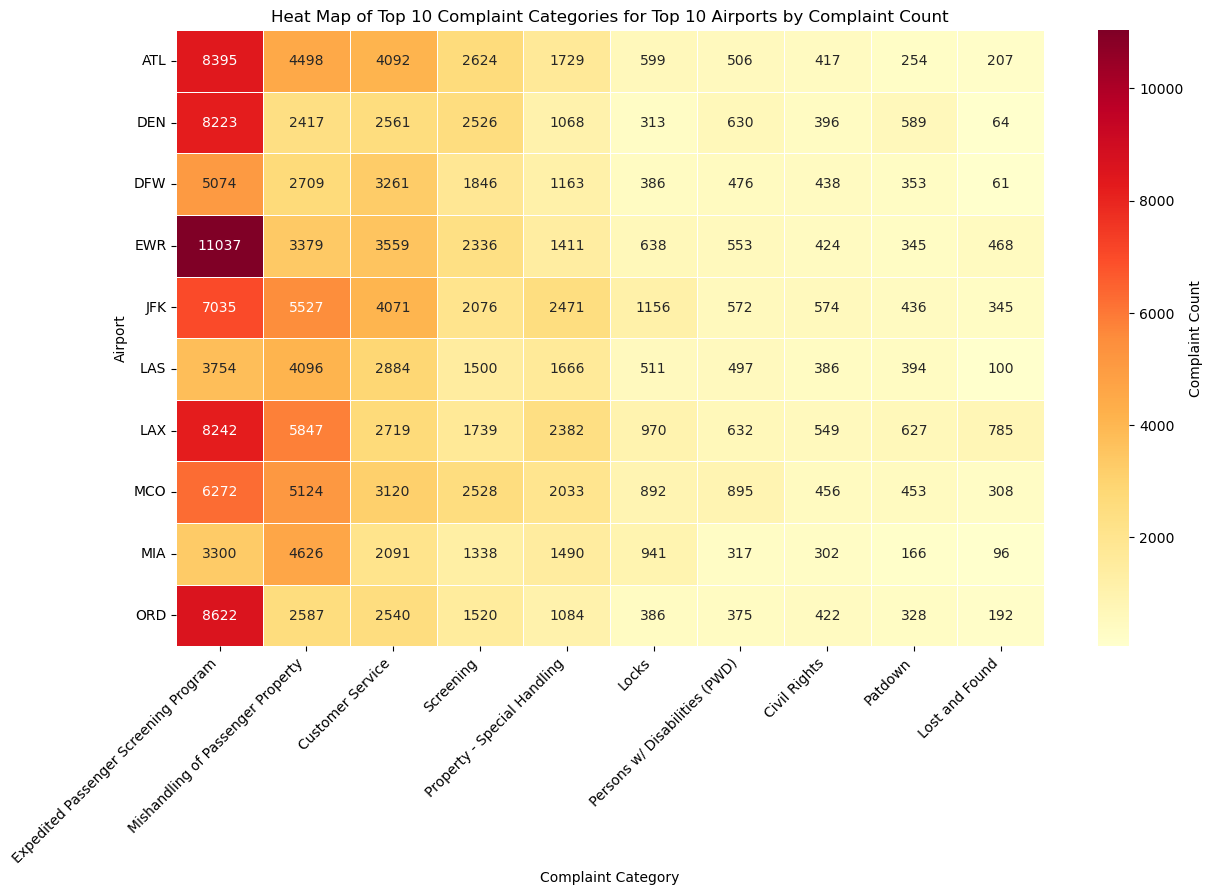

In [5]:
# Load the complaints-by-airport.csv file
complaints_airport = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-640\\Week-10\\complaints-by-category.csv')

# Group by 'airport' to get total complaints per airport and select top 10 airports by complaint count
top_airports = complaints_airport.groupby('airport')['count'].sum().nlargest(10).index

# Filter data for only the top 10 airports
top_airport_data = complaints_airport[complaints_airport['airport'].isin(top_airports)]

# Group by 'airport' and 'category', summing complaints to prepare data for heatmap
heatmap_data = top_airport_data.groupby(['airport', 'category'])['count'].sum().unstack(fill_value=0)

# Select top 10 categories with the highest total complaint counts across these airports
top_categories = heatmap_data.sum(axis=0).nlargest(10).index
heatmap_data_top10_categories = heatmap_data[top_categories]

# Plotting heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_top10_categories, cmap='YlOrRd', annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Complaint Count'})
plt.title('Heat Map of Top 10 Complaint Categories for Top 10 Airports by Complaint Count')
plt.xlabel('Complaint Category')
plt.ylabel('Airport')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


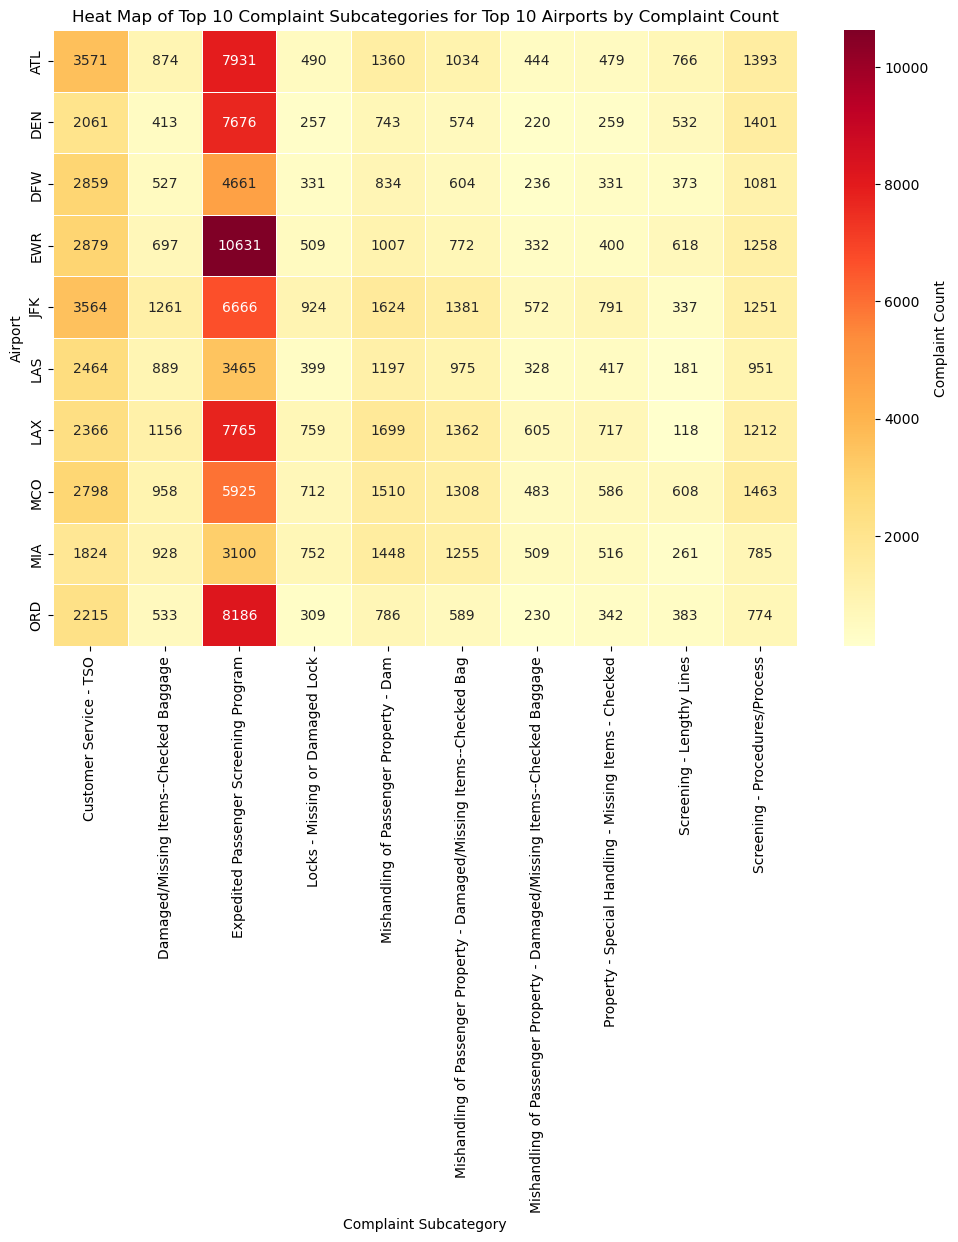

In [9]:
# Load the data from the complaints-by-subcategory.xlsx file
complaints_subcategory = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-640\\Week-10\\complaints-by-subcategory.csv')

# Summing up the complaints by airport and subcategory
airport_complaints_total = complaints_subcategory.groupby('airport')['count'].sum()

# Selecting the top 10 airports with the highest number of complaints
top_10_airports = airport_complaints_total.nlargest(10).index
complaints_top_10_airports = complaints_subcategory[complaints_subcategory['airport'].isin(top_10_airports)]

# Further group by subcategory to get top 10 complaint subcategories for these airports
subcategory_complaints_total = complaints_top_10_airports.groupby('subcategory')['count'].sum()
top_10_subcategories = subcategory_complaints_total.nlargest(10).index
complaints_top_10_airports_subcategories = complaints_top_10_airports[complaints_top_10_airports['subcategory'].isin(top_10_subcategories)]

# Creating a pivot table for the heatmap data with airport as rows and subcategory as columns
heatmap_data = complaints_top_10_airports_subcategories.pivot_table(
    values='count', 
    index='airport', 
    columns='subcategory', 
    aggfunc='sum', 
    fill_value=0
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Complaint Count'})
plt.title('Heat Map of Top 10 Complaint Subcategories for Top 10 Airports by Complaint Count')
plt.xlabel('Complaint Subcategory')
plt.ylabel('Airport')
plt.show()


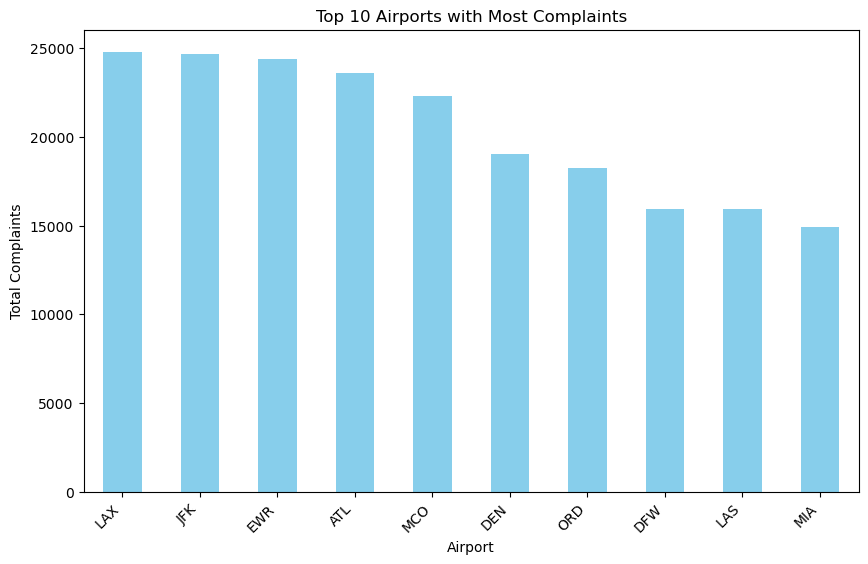

In [11]:
# Load the complaints-by-airport data
complaints_airport = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-640\\Week-10\\complaints-by-airport.csv')

# Group by airport and sum the complaints
airport_complaints = complaints_airport.groupby('airport')['count'].sum().nlargest(10)

# Plotting bar plot
plt.figure(figsize=(10, 6))
airport_complaints.plot(kind='bar', color='skyblue')
plt.title('Top 10 Airports with Most Complaints')
plt.xlabel('Airport')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1400x800 with 0 Axes>

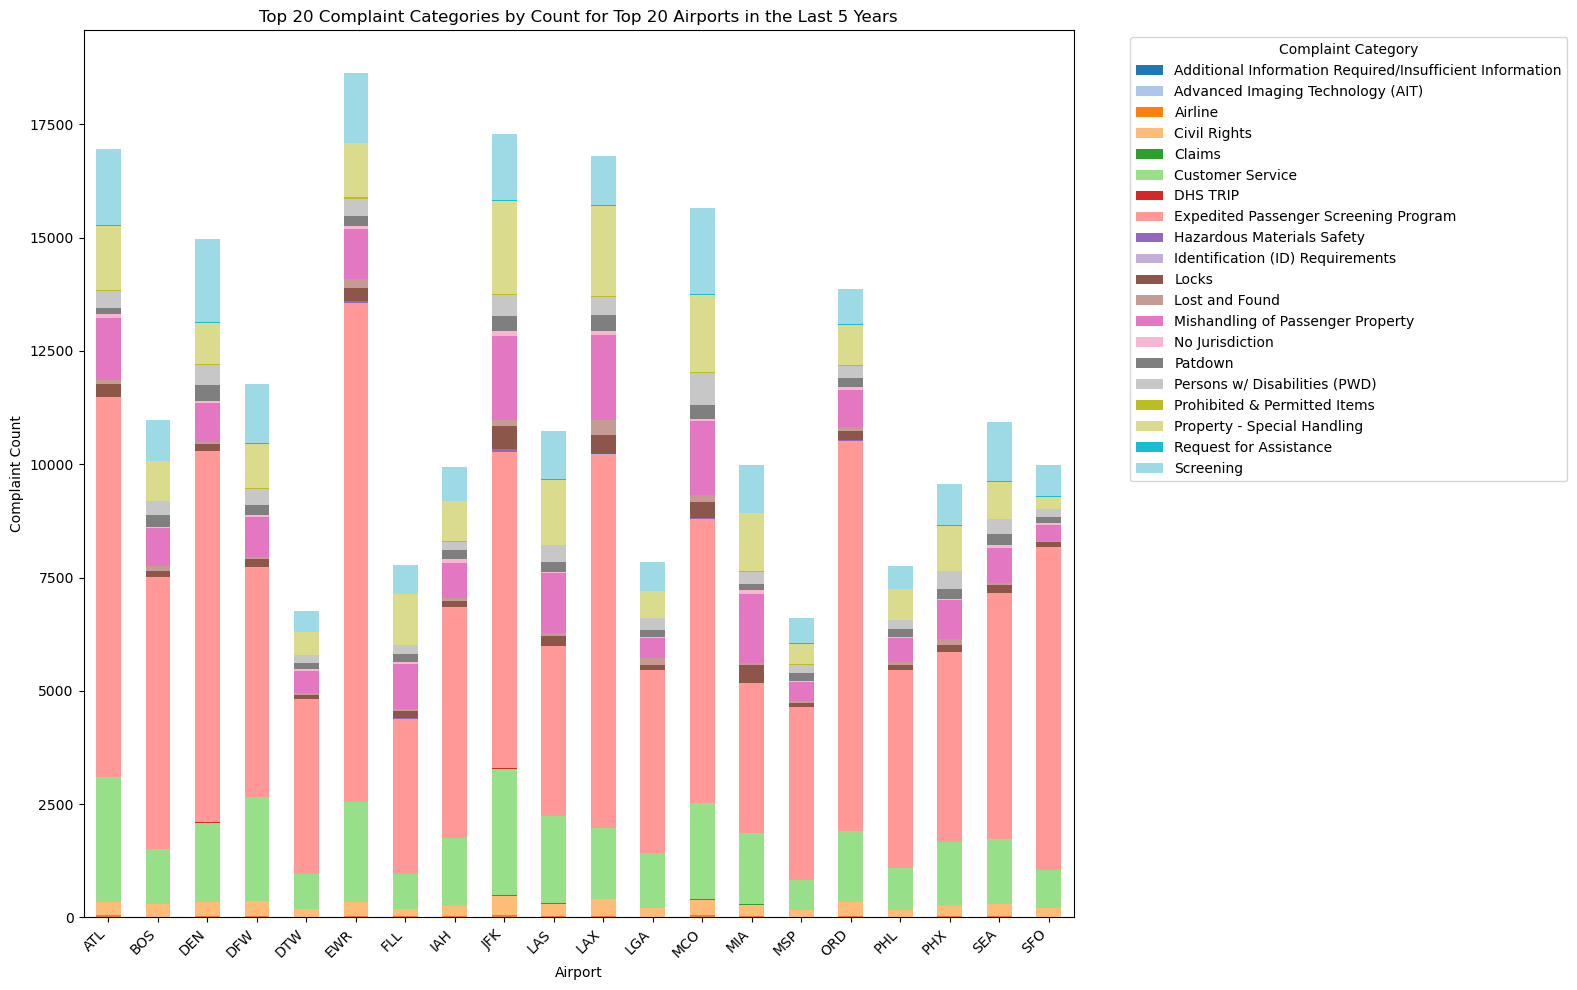

In [41]:
# Load the complaints-by-airport.csv file
complaints_category = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-640\\Week-10\\complaints-by-category.csv')

# Filter data for the last 5 years
complaints_category['pdf_report_date'] = pd.to_datetime(complaints_category['pdf_report_date'])
last_5_years = complaints_category['pdf_report_date'].dt.year >= (complaints_category['pdf_report_date'].dt.year.max() - 4)
complaints_last_5_years = complaints_category[last_5_years]

# Sum complaints by airport and category
complaints_summary = complaints_last_5_years.groupby(['airport', 'category'])['count'].sum().reset_index()

# Select top 20 airports and top 20 categories by total complaints count
top_20_airports = complaints_summary.groupby('airport')['count'].sum().nlargest(20).index
top_20_categories = complaints_summary.groupby('category')['count'].sum().nlargest(20).index

# Filter data to include only the top 20 airports and categories
top_complaints_data = complaints_summary[
    complaints_summary['airport'].isin(top_20_airports) &
    complaints_summary['category'].isin(top_20_categories)
]

# Pivot data for stacked bar chart
stacked_data = top_complaints_data.pivot_table(
    values='count', 
    index='airport', 
    columns='category', 
    aggfunc='sum', 
    fill_value=0
)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
stacked_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 10))

# Customizing the plot
plt.title('Top 20 Complaint Categories by Count for Top 20 Airports in the Last 5 Years')
plt.xlabel('Airport')
plt.ylabel('Complaint Count')
plt.legend(title='Complaint Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



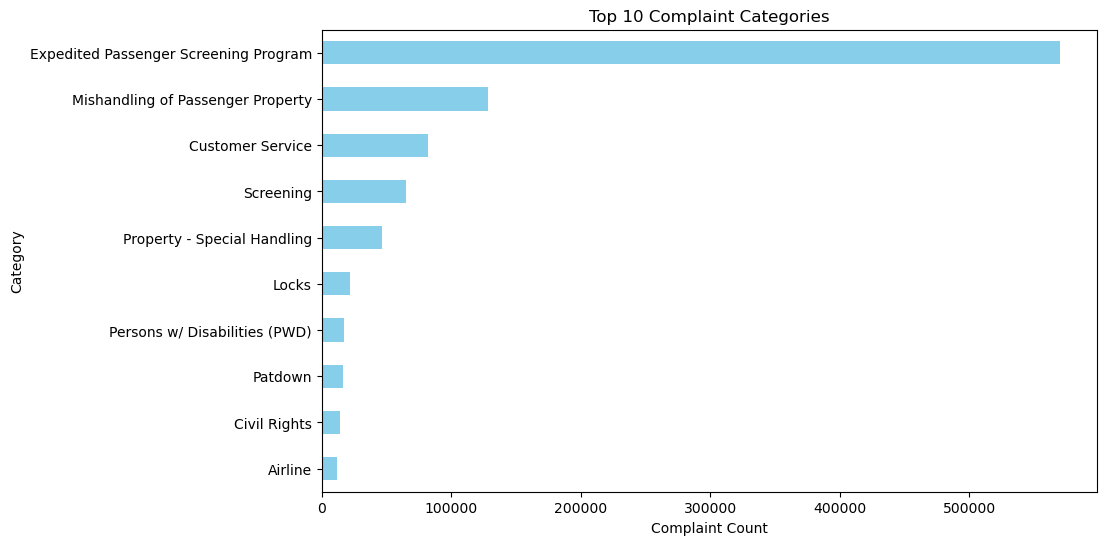

In [51]:
# Summing complaint counts by category
top_categories = complaints_category.groupby('category')['count'].sum().nlargest(10).sort_values()

# Plotting custom bar chart
plt.figure(figsize=(10, 6))
top_categories.plot(kind='barh', color='skyblue')
plt.title('Top 10 Complaint Categories')
plt.xlabel('Complaint Count')
plt.ylabel('Category')
plt.show()


C:\Users\Chitramoy\AppData\Local\Temp\ipykernel_15120\2224697846.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['year_month'].dt.month


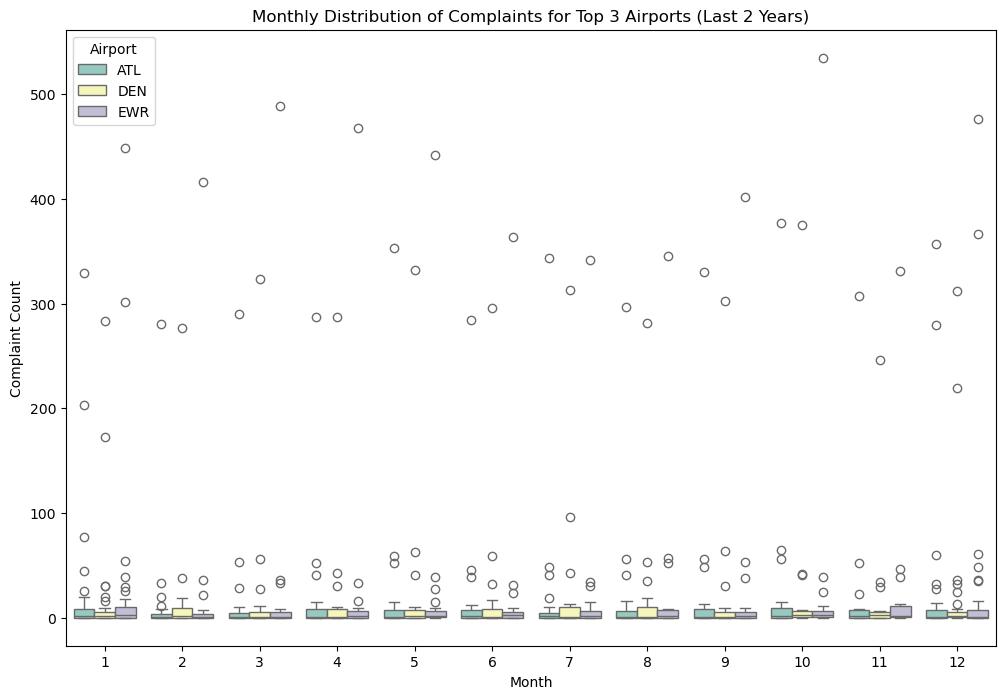

In [51]:
# Load the data
complaints_data = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-640\\Week-10\\complaints-by-category.csv')

# Convert 'year_month' to datetime and filter for the last 2 years
complaints_data['year_month'] = pd.to_datetime(complaints_data['year_month'], format='%Y-%m')
recent_data = complaints_data[complaints_data['year_month'] >= pd.Timestamp.now() - pd.DateOffset(years=2)]

# Find the top 3 airports with the most complaints
top_airports = recent_data.groupby('airport')['count'].sum().nlargest(3).index
filtered_data = recent_data[recent_data['airport'].isin(top_airports)]

# Extract month for the filtered data
filtered_data['month'] = filtered_data['year_month'].dt.month

# Plotting the box plot for monthly distribution of complaints for the top 3 airports
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='month', y='count', hue='airport', palette="Set3")
plt.title('Monthly Distribution of Complaints for Top 3 Airports (Last 2 Years)')
plt.xlabel('Month')
plt.ylabel('Complaint Count')
plt.legend(title='Airport')
plt.show()



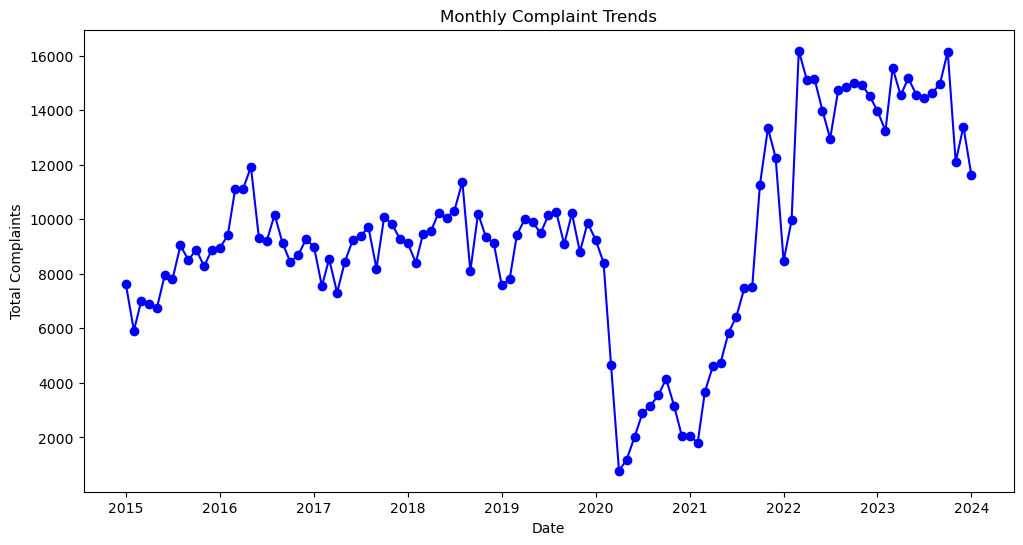

In [53]:
# Grouping complaints by month
monthly_trends = complaints_airport.groupby('year_month')['count'].sum().reset_index()

# Plotting trend line
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['year_month'], monthly_trends['count'], marker='o', color='b')
plt.title('Monthly Complaint Trends')
plt.xlabel('Date')
plt.ylabel('Total Complaints')
plt.show()


In [19]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the complaints-by-airport and iata-icao data
complaints_airport = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-640\\Week-10\\complaints-by-airport.csv')
iata_icao = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-640\\Week-10\\iata-icao.csv')

# Aggregate complaint counts by airport and merge with location information
complaints_airport_total = complaints_airport.groupby('airport')['count'].sum().reset_index()
airport_locations = complaints_airport_total.merge(iata_icao[['airport', 'latitude', 'longitude']], on='airport')

# Identify top 10 airports with the most complaints
top_10_airports = airport_locations.nlargest(10, 'count')

# Create a folium map centered in the US
complaints_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap layer for all airports
heat_data = [[row['latitude'], row['longitude'], row['count']] for index, row in airport_locations.iterrows()]
HeatMap(heat_data, max_zoom=12, radius=15, blur=10).add_to(complaints_map)

# Add markers for top 10 airports with the most complaints
for _, row in top_10_airports.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['airport']}: {row['count']} complaints",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(complaints_map)

# Save map as HTML
complaints_map.save('complaints_density_map_top10.html')
complaints_map
